## Initializations, module imports, and compatibility headers

In [1]:
# main python2 compatibility import
from __future__ import print_function, division

# sage compatibility
%matplotlib inline

import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.7)

## Integrators

The integrators are provided in the separate modules referred below.
The source code can be found in the `integrators` folder

In [2]:
# RungeKutta4 for the damped harmonic oscillator with dumping 
# paramter a and forcing of the form beta*sin(omega*t) and
# regularized relative error function
from integrators.common import rk4_forced as rk4, relerr

# Reference solution for the forced oscillator with dumping 
# paramter a and forcing of the form beta*sin(omega*t)
from integrators.forcedoscillator import reference, dreference

# Symplectic integrators for the damped harmonic oscillator 
# with dumping parameter a and forcing of the form beta*sin(omega*t)
from integrators.forcedoscillator import euler, leapfrog, \
    ruth3, variational_noncontact #, leapfrog2, pseudoleapfrog

# Contact integrators as described in the paper for the
# damped harmonic oscillator with dumping parameter a and 
# forcing of the form beta*sin(omega*t)
from integrators.forcedoscillator import contact, symcontact

## Comparative plots generator

We consider here the Lagrangian of a mechanical system with Raileigh dissipation and external forcing $f(t)$
$$
\mathcal{L}(t, x, \dot{x}, z) = \frac12 \dot{x}^2 -V(x) -\alpha z +f(t) x
$$
as described in Example 6 in the paper.

If $V'(x) = x$ and $f(t) = \beta\sin(\omega t)$ for some $\beta,\omega\neq0$, it is well known the equation above with has an analytic solution given by
$$
x(t) = \frac{-\beta}{\sqrt{\alpha^2\omega^2 + (1-\omega^2)^2}} \sin(\omega t + \phi), 
\qquad
\phi = \arctan\left(\frac{\alpha\omega}{\omega^2 - 1}\right) + n\pi.
$$
We will use this analytic solution to check our numerical scheme and compare it with other symplectic integrators.

Note that the solution above is not the most general solution, and for a given triple $(\alpha, \beta, \omega)$ it corresponds to the one with initial conditions
$$
x(0) = \frac{-\beta}{\sqrt{\alpha^2\omega^2 + (1-\omega^2)^2}} \sin(\phi), \qquad x'(0) = \frac{-\beta\omega}{\sqrt{\alpha^2\omega^2 + (1-\omega^2)^2}} \cos(\phi)
$$

In [6]:
def cmp_plot(init, tspan, a, beta, omega, h, save=False):
    
    timerange = np.arange(tspan[0], tspan[1], h)

    r = reference(a, beta, omega)(timerange)

    s1 = contact(init, tspan, a, beta, omega, h)
    s2 = symcontact(init, tspan, a, beta, omega, h)
    s3 = euler(init, tspan, a, beta, omega, h)
    s4 = leapfrog(init, tspan, a, beta, omega, h)
    #s5 = leapfrog2(init, tspan, a, beta, omega, h)
    s6 = ruth3(init, tspan, a, beta, omega, h)
    s8 = variational_noncontact(init, tspan, a, beta, omega, h)
    s7 = rk4(init, tspan, a, beta, omega, h)
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(211)
    # if we drop py2 compatibility we can use *init instead of
    # init[0], init[1]
    plt.title("Solution for $h={}$, \
        $(\\alpha, \\beta, \\omega)=({},{},{:.3f})$, \
        $(p_0,q_0)=({:.3f},{:.3f})$".
              format(h, a, beta, omega, init[0], init[1])
             )
    plt.plot(timerange, s1[:,1], label="Contact (1st)", linestyle="--")
    plt.plot(timerange, s2[:,1], label="Contact (2nd)", linestyle="-.")
    #plt.plot(timerange, s3[:,1], label="Symplectic Euler", linestyle=":")
    plt.plot(timerange, s4[:,1], label="Leapfrog", linestyle=":")
    #plt.plot(timerange, s5[:,1], label="Leapfrog (single step)", linestyle=":")
    plt.plot(timerange, s8[:,1], label="VNC", linestyle=":")
    plt.plot(timerange, s6[:,1], label="Ruth3", linestyle=":")
    plt.plot(timerange, s7[:,1], label="RK4", linestyle="-")
    plt.plot(timerange, r[:], label="Reference", linestyle="-")
    plt.legend()
    
    plt.subplot(212)
    plt.title("Relative Error")
    plt.plot(timerange, relerr(r[:],s1[:,1]), label="Contact (1st)", linestyle="--")
    plt.plot(timerange, relerr(r[:],s2[:,1]), label="Contact (2nd)", linestyle="-.")
    #plt.plot(timerange, relerr(r[:],s3[:,1]), label="Symplectic Euler", linestyle=":")
    plt.plot(timerange, relerr(r[:],s4[:,1]), label="Leapfrog", linestyle=":")
    #plt.plot(timerange, relerr(r[:],s5[:,1]), label="Leapfrog (single step)", linestyle=":")
    plt.plot(timerange, relerr(r,s8[:,1]), label="VNC", linestyle=":")
    plt.plot(timerange, relerr(r[:],s6[:,1]), label="Ruth3", linestyle=":")
    plt.plot(timerange, relerr(r[:],s7[:,1]), label="RK4", linestyle="-")
    plt.legend()
    
    if save:
        name = "forced{}.pdf".format(a)
        plt.savefig(name, format="pdf", transparent=True)

    plt.show()

## Comparative Plots

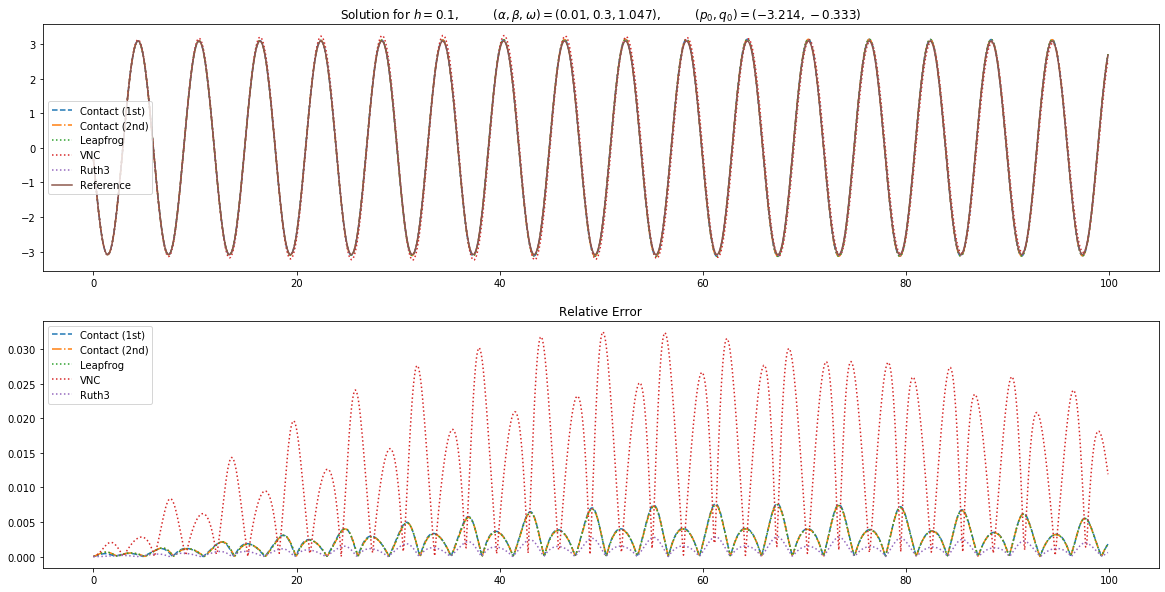

In [7]:
tspan = (0.0, 100.0)
a = 0.01
beta = 0.3
omega = np.pi/3.0
init = (dreference(a, beta, omega)(0), reference(a, beta, omega)(0))
h = 0.1

cmp_plot(init, tspan, a, beta, omega, h)

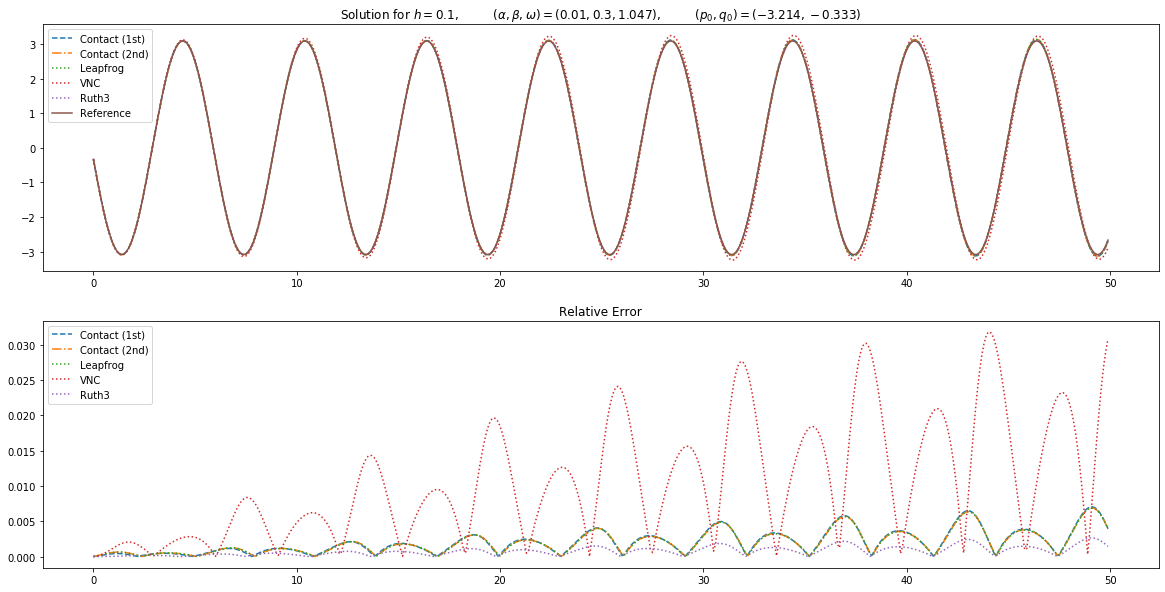

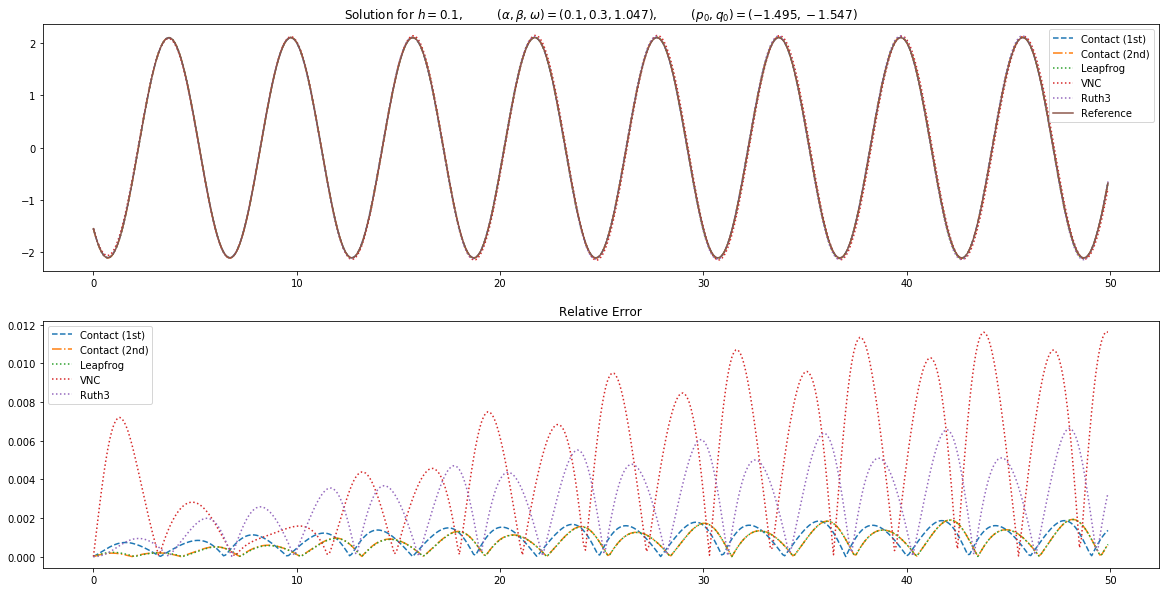

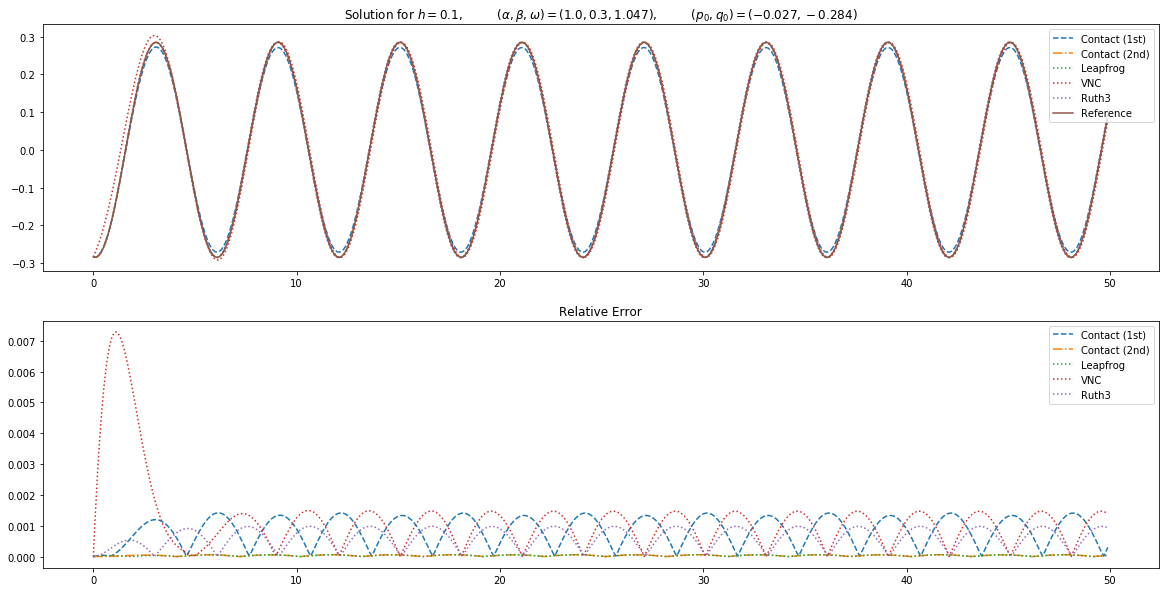

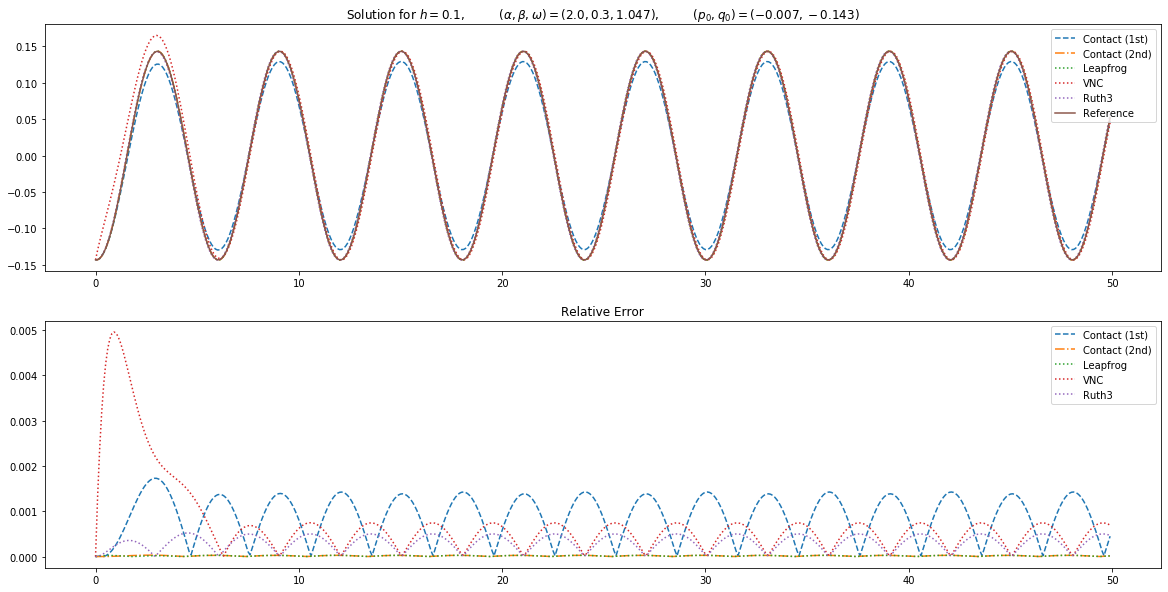

In [8]:
beta = 0.3
omega = np.pi/3
tspan = (0.0, 50.0)

for a in [.01, 0.1, 1.0, 2.0]:
    #if a > .5:
    #    tspan = (0.0, 15.0)
    for h in [0.1]:
        init = (dreference(a, beta, omega)(0), reference(a, beta, omega)(0))
        cmp_plot(init, tspan, a, beta, omega, h) #, save=True)